# Estudio de el Titanic
A continuación se muestra un dataset sobre las situación dramatica vivida con el titanic, identifique la cantidad de muertos 
por clases y elabore un gráfico donde se observen las conclusiones.  

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [58]:
df =pd.read_csv("Titanic2.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [40]:
## Para hallar la cantidad de sobrevivientes se aplica el siguiente procedimiento
##Fallecieron 549 pasajeros y sobrevivieron 342
Survival = df.groupby('Survived').count()
Survival

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [45]:
# Sobrevivieron 93 del embarque C, 30 de la Q y 217 de la S
Survival1 = df.groupby(['Survived','Embarked']).count().reset_index()
Survival1          

,Survived,Embarked,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,C,75,75,75,75,51,75,75,75,75,17
1,0,Q,47,47,47,47,20,47,47,47,47,2
2,0,S,427,427,427,427,353,427,427,427,427,49
3,1,C,93,93,93,93,79,93,93,93,93,52
4,1,Q,30,30,30,30,8,30,30,30,30,2
5,1,S,217,217,217,217,201,217,217,217,217,80


In [48]:
Survival2 =['Survived', 'Embarked', 'Pclass']
Sur3=Survival1[Survival2]
Sur3

,Survived,Embarked,Pclass
0,0,C,75
1,0,Q,47
2,0,S,427
3,1,C,93
4,1,Q,30
5,1,S,217


In [52]:
combinacion_pivot=Sur3.pivot(
                  columns='Survived',
                  index='Embarked',
                  values= 'Pclass'
).reset_index()
combinacion_pivot

Survived,Embarked,0,1
0,C,75,93
1,Q,47,30
2,S,427,217


In [31]:
## Elaboración del gráfico, representativo de los sobrevientes y los que fallecieron
## Barras Lado a Lado
# Para el primer dataset
n =1   ## Nro. de Datasets
t =2  ## Nro. de Dataset
d =3  ## Nro. de Barras
w =0.8  ## Anchos de Barras

Espacio_B=[t * element +w*n for element in range(d)]
Espacio_B
           

[0.8, 2.8, 4.8]

In [32]:
# Para el segundo dataset
n =2   ## Nro. de Datasets
t =2  ## Nro. de Dataset
d =3  ## Nro. de Barras
w =0.8  ## Anchos de Barras

Espacio2_B=[t * element +w*n for element in range(d)]
Espacio2_B
           

[1.6, 3.6, 5.6]

In [33]:
Cabina = ['C', 'Q','S']
Fallecieron = [75, 47, 427]
Sobrevivieron = [ 93, 30, 217]

C:\Users\Carolina Lopez\anaconda3\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


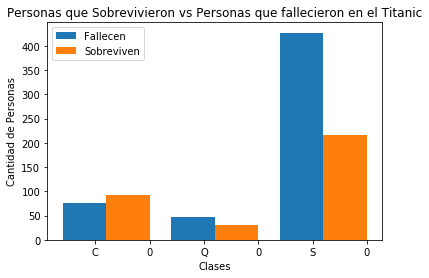

In [49]:
plt.bar(Espacio_B, Fallecieron, label= "Fallecen")
plt.bar(Espacio2_B, Sobrevivieron, label= "Sobreviven")

ax=plt.subplot(1,1,1)
plt.title("Personas que Sobrevivieron vs Personas que fallecieron en el Titanic")
plt.xlabel("Clases")
plt.ylabel("Cantidad de Personas")
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(["C", 0, "Q", 0 , "S", 0])

plt.legend()
plt.show()